# Government Expenditure on Education

In [1]:
import matplotlib.pyplot as plt
from pandas_datareader import wb
import pandas as pd
from src.utils import apply_matplotlib_settings
import statsmodels.api as sm
import statsmodels.formula.api as smf


apply_matplotlib_settings()

In [2]:
search1 = wb.search("Government expenditure on education")
# search1 = search1.drop(columns=["unit", "sourceNote", "topics"])
# search1

In [36]:
raw = wb.download(
    indicator=["SE.XPD.TOTL.GD.ZS"], country="all", start=2000, end=2023
)
raw = raw.rename(columns={raw.columns[0]: "% of GDP"})
raw.index = raw.index.set_levels(raw.index.levels[1].astype(int), level=1)
raw

% of GDP
country                     year          
Africa Eastern and Southern 2022  3.906225
                            2021  4.632255
                            2020  4.352440
                            2019  4.541950
                            2018  4.739750
...                                    ...
Zimbabwe                    2004       NaN
                            2003       NaN
                            2002       NaN
                            2001       NaN
                            2000       NaN

[6118 rows x 1 columns]

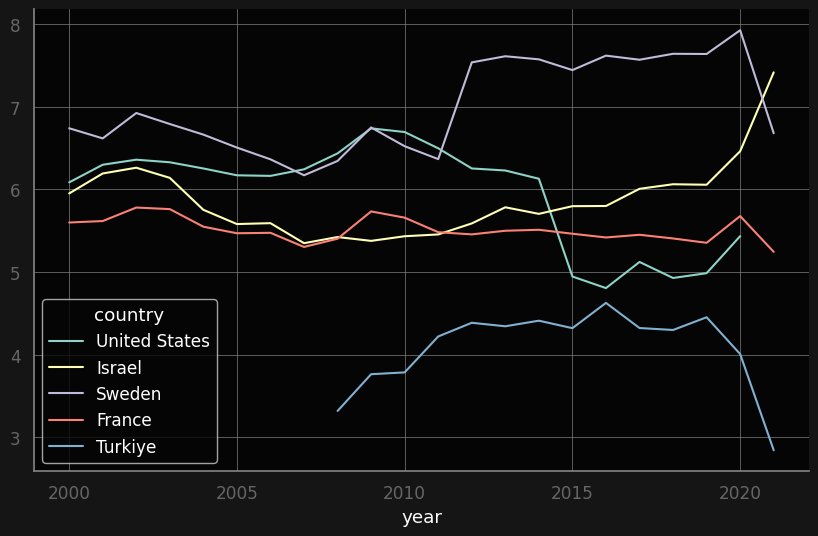

In [5]:
country_selector = "|".join(
    [
        "United States",
        "France",
        "Turkiye",
        "Sweden",
        # "Norway",
        # "Kenya",
        "Israel",
    ]
)
fig, ax = plt.subplots()
countries = raw.filter(regex=country_selector, axis=0).sort_values(by="year")
by_years = countries.dropna().swaplevel().unstack()["% of GDP"]
by_years.plot(ax=ax)
ax.spines.top.set_visible(False)
ax.spines.right.set_visible(False)
fig.show()

In [31]:
raw.loc[
    ["United States", "Sweden", "Turkiye"], range(2019, 2022, 1), :
].pct_change()

% of GDP
country       year          
United States 2019       NaN
              2020  0.089861
              2021  0.000000
Sweden        2019  0.405316
              2020  0.037586
              2021 -0.157168
Turkiye       2019 -0.333225
              2020 -0.100004
              2021 -0.290207

In [54]:
a = raw.copy()
a_slice = a.loc[
    ["United States", "Sweden", "Turkiye"], range(2019, 2022, 1), :
].copy()
a_slice["change"] = a_slice["% of GDP"].pct_change(periods=1)
a_slice

% of GDP    change
country       year                    
United States 2019  4.987280       NaN
              2020  5.435440  0.089861
              2021       NaN  0.000000
Sweden        2019  7.638510  0.405316
              2020  7.925610  0.037586
              2021  6.679961 -0.157168
Turkiye       2019  4.454030 -0.333225
              2020  4.008610 -0.100004
              2021  2.845283 -0.290207

In [ ]:
raw.assign(difference=(raw["% of GDP"] - raw["% of GDP"]))

% of GDP  difference
country                     year                      
Africa Eastern and Southern 2022  3.906225         0.0
                            2021  4.632255         0.0
                            2020  4.352440         0.0
                            2019  4.541950         0.0
                            2018  4.739750         0.0
...                                    ...         ...
Zimbabwe                    2004       NaN         NaN
                            2003       NaN         NaN
                            2002       NaN         NaN
                            2001       NaN         NaN
                            2000       NaN         NaN

[6118 rows x 2 columns]

In [ ]:
swapped = raw.swaplevel().sort_index()
swapped.loc[2020:2022]

% of GDP
year country                              
2020 Afghanistan                       NaN
     Africa Eastern and Southern  4.352440
     Africa Western and Central   3.403950
     Albania                      3.342300
     Algeria                      7.042397
...                                    ...
2022 West Bank and Gaza                NaN
     World                             NaN
     Yemen, Rep.                       NaN
     Zambia                       3.582595
     Zimbabwe                          NaN

[798 rows x 1 columns]

In [ ]:
raw.swaplevel().loc[range(2020, 2023)]

% of GDP
year country                                 
2020 Africa Eastern and Southern     4.352440
     Africa Western and Central      3.403950
     Arab World                           NaN
     Caribbean small states          4.912138
     Central Europe and the Baltics  4.721590
...                                       ...
2022 Virgin Islands (U.S.)                NaN
     West Bank and Gaza                   NaN
     Yemen, Rep.                          NaN
     Zambia                          3.582595
     Zimbabwe                             NaN

[798 rows x 1 columns]

In [ ]:
last_two = raw.loc[:, range(2021, 2023), :]
print(last_two.index.unique(level=1))
print(last_two.index.levels[1])
print(last_two.index.get_level_values(1))

Index([2021, 2022], dtype='int64', name='year')
Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='year')
Index([2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021, 2021,
       ...
       2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
      dtype='int64', name='year', length=532)


In [ ]:
usa_data = raw.loc["United States"].dropna()
reg = sm.OLS(usa_data.index.to_numpy(), usa_data["% of GDP"].to_numpy()).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.989
Method:                 Least Squares   F-statistic:                              1818.
Date:                Fri, 02 Feb 2024   Prob (F-statistic):                    4.12e-21
Time:                        10:06:48   Log-Likelihood:                         -142.05
No. Observations:                  21   AIC:                                      286.1
Df Residuals:                      20   BIC:                                      287.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           333.7798      7.828     42.639      0.000     317.451     350.109
==============================================================================
Omnibus:                        3.882   Durbin-Watson:                   0.250
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.011
Skew:                           0.813   Prob(JB):                        0.222
Kurtosis:                       2.107   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

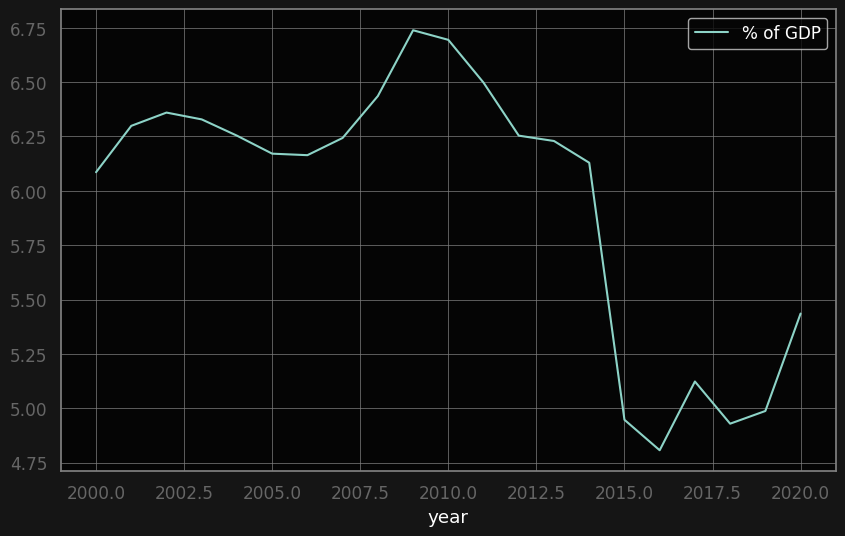

In [ ]:
fig, ax = plt.subplots()
usa_data.plot(ax=ax)
fig.show()